In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import io
import math
import numpy as np
import seaborn as sn

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BMD-2.csv to BMD-2.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['BMD-2.csv']))

In [4]:
df.describe()

,Age,Weight_kg,Height_cm,BMD
count,169.000000,169.000000,169.000000,169.000000
mean,63.631531,64.665680,160.254438,0.783104
std,12.356936,11.537171,7.928272,0.166529
min,35.814058,36.000000,142.000000,0.407600
25%,54.424211,56.000000,154.000000,0.670800
50%,63.487837,64.500000,160.500000,0.786100
75%,72.080558,73.000000,166.000000,0.888800
max,88.753795,96.000000,177.000000,1.362400


In [5]:
# 1. Data Dimensionality
# Total number of patients
total_patients = df.shape[0]

# Number of attributes (categories)
number_of_attributes = df.shape[1]

# Data types of the attributes
data_types = df.dtypes

# Checking for missing values
missing_values = df.isnull().sum()

#Number of patients in each target class
Fracture_counts = df['Fracture'].value_counts()


# Printing the results
print(f"Total number of patients: {total_patients}")
print(f"Number of attributes: {number_of_attributes}")
print("\nData Types:")
print(data_types)
print("\nMissing Values:")
print(missing_values)
print("\nNumber of patients in each target class:")
print(Fracture_counts)

Total number of patients: 169
Number of attributes: 5

Data Types:
Age          float64
Weight_kg    float64
Height_cm    float64
BMD          float64
Fracture      object
dtype: object

Missing Values:
Age          0
Weight_kg    0
Height_cm    0
BMD          0
Fracture     0
dtype: int64

Number of patients in each target class:
Fracture
no fracture    119
fracture        50
Name: count, dtype: int64


In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, r2_score, accuracy_score, classification_report
from sklearn import tree
from sklearn import svm
from pandas.plotting import scatter_matrix

In [9]:
X = df.drop('Fracture', axis=1)
Y = df['Fracture']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Accuracy with Support Vector Machine using Linear Kernel Function:  0.834319526627219

              precision    recall  f1-score   support

    fracture       0.79      0.60      0.68        50
 no fracture       0.85      0.93      0.89       119

    accuracy                           0.83       169
   macro avg       0.82      0.77      0.78       169
weighted avg       0.83      0.83      0.83       169



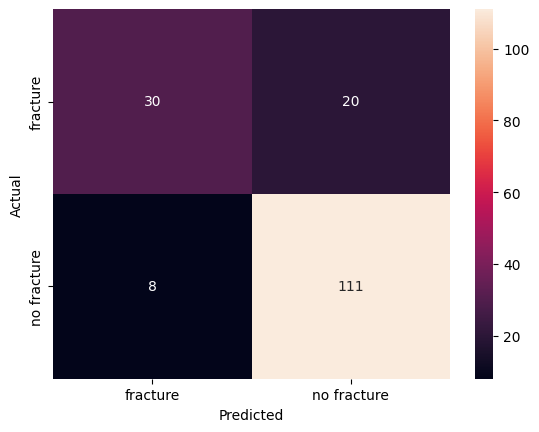

In [11]:
#Support Vector Machine using Linear Kernel Function
svm_model = svm.SVC(kernel='linear', C = 2.0)
# Fit model
svm_model.fit(X, Y)

Y_pred = svm_model.predict(X)

#Misclassified patients and Classification accuracy
confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='d')
print('Accuracy with Support Vector Machine using Linear Kernel Function: ',metrics.accuracy_score(Y, Y_pred))
print()
print(classification_report(Y, Y_pred))
plt.show()

Accuracy with Support Vector Machine using Radial Basis Function:  1.0

              precision    recall  f1-score   support

    fracture       1.00      1.00      1.00        50
 no fracture       1.00      1.00      1.00       119

    accuracy                           1.00       169
   macro avg       1.00      1.00      1.00       169
weighted avg       1.00      1.00      1.00       169



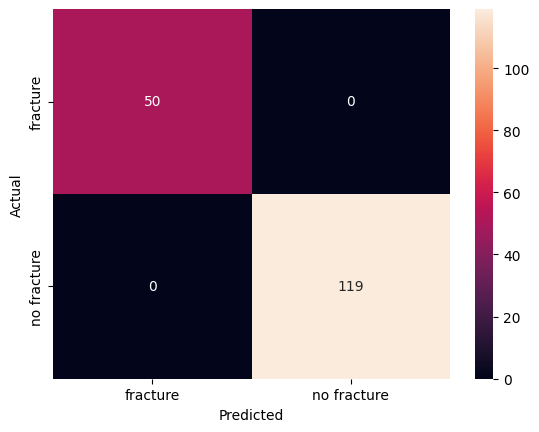

In [13]:
#Support Vector Machine using Radial Basis Function
nonlinear_clf = svm.SVC(kernel='rbf', gamma=0.5, C=1.0)
nonlinear_clf.fit(X,Y)
Y_pred=nonlinear_clf.predict(X)

#Misclassified patients and Classification accuracy
confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='d')
print('Accuracy with Support Vector Machine using Radial Basis Function: ',metrics.accuracy_score(Y, Y_pred))
print()
print(classification_report(Y, Y_pred))
plt.show()

Accuracy with Random Forest, estimator value = 5:  0.9940828402366864

              precision    recall  f1-score   support

    fracture       0.98      1.00      0.99        50
 no fracture       1.00      0.99      1.00       119

    accuracy                           0.99       169
   macro avg       0.99      1.00      0.99       169
weighted avg       0.99      0.99      0.99       169



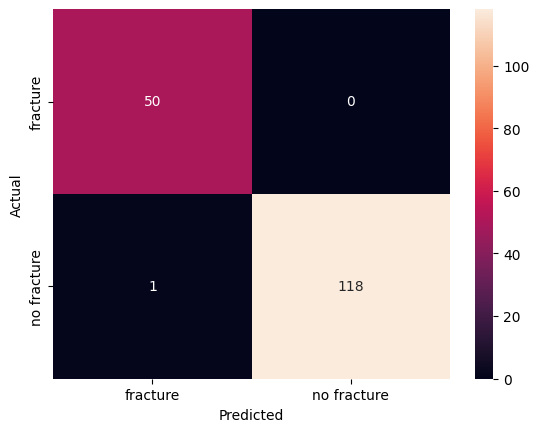

[0.21351395792933137, 0.11163085855115122, 0.11520070379699204, 0.5596544797225254]


In [45]:
#Random Forest
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='d')

print('Accuracy with Random Forest, estimator value = 5: ',metrics.accuracy_score(Y, Y_pred))
print()
print(classification_report(Y, Y_pred))
plt.show()

importances = list(clf.feature_importances_)
#Print out the feature and importances
print (importances)

Accuracy with Decison Tree Classifier, depth value = 8:  0.9940828402366864

              precision    recall  f1-score   support

    fracture       0.98      1.00      0.99        50
 no fracture       1.00      0.99      1.00       119

    accuracy                           0.99       169
   macro avg       0.99      1.00      0.99       169
weighted avg       0.99      0.99      0.99       169



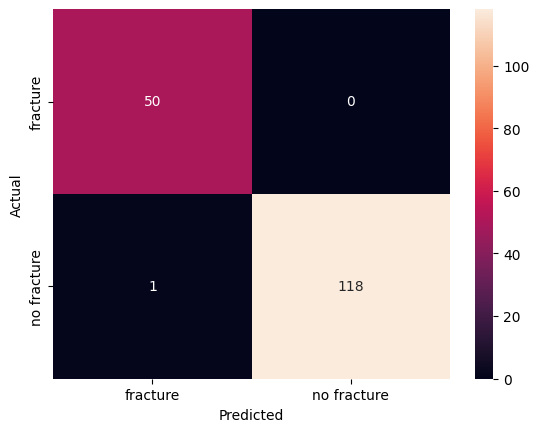

[0.16808471373173034, 0.03474189127455459, 0.12494053873972276, 0.6722328562539923]


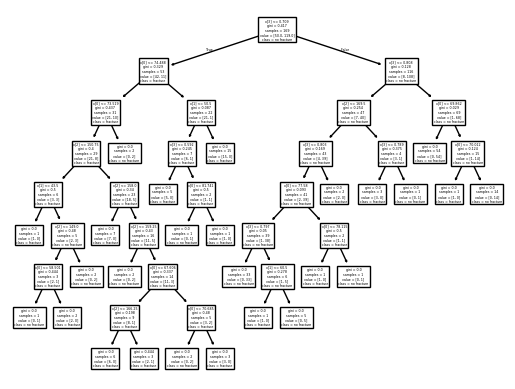

In [23]:
#Decison Tree Classifier
clf = DecisionTreeClassifier(max_depth=8)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='d')

print('Accuracy with Decison Tree Classifier, depth value = 8: ',metrics.accuracy_score(Y, Y_pred))
print()
print(classification_report(Y, Y_pred))
plt.show()

importances = list(clf.feature_importances_)
#Print out the feature and importances
print (importances)

tree.plot_tree(clf.fit(X,Y), class_names=['fracture','no fracture'])
plt.show()


Accuracy with Lasso Regularization: 0.863905325443787

              precision    recall  f1-score   support

    fracture       0.81      0.70      0.75        50
 no fracture       0.88      0.93      0.91       119

    accuracy                           0.86       169
   macro avg       0.85      0.82      0.83       169
weighted avg       0.86      0.86      0.86       169



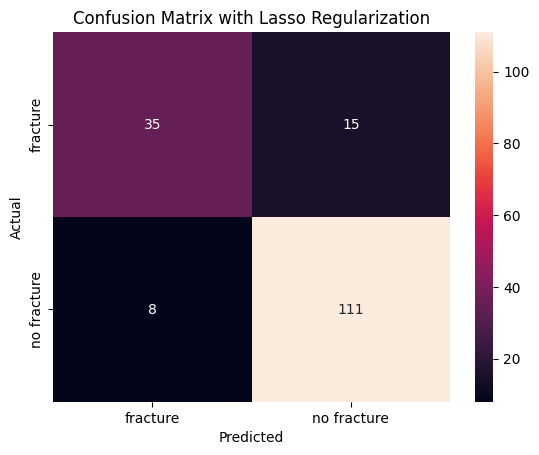

In [25]:
#Logistic Regression using Lasso
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
lasso_model.fit(X, Y)
lasso_pred = lasso_model.predict(X)
lasso_accuracy = accuracy_score(Y, lasso_pred)
print("\nAccuracy with Lasso Regularization:", lasso_accuracy)
print()
print(classification_report(Y, lasso_pred))

lasso_conf_matrix = pd.crosstab(Y, lasso_pred, rownames=['Actual'], colnames=['Predicted'])

# Confusion matrix with Lasso Regularization
sn.heatmap(lasso_conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix with Lasso Regularization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()